# Modelagem Matemática: Alocação de Motoristas para Entregas

## Conjuntos e Parâmetros

- $ I $: conjunto de motoristas ($ i \in I $)
- $ J $: conjunto de entregas ou demandas ($ j \in J $)
- $ c\_{ij} $: distância entre o motorista $ i $ e o ponto de coleta da entrega $ j $
- $ t_j $: distância da coleta à entrega para a demanda $ j $
- $ q\_{jk} $: distância entre o ponto de entrega da demanda $ j $ e o ponto de coleta da demanda $ k $

## Variante 1: Cada motorista alocado a **uma única entrega**

### Variáveis

$x_{ij} \in \{0, 1\}, $ 1 se o motorista $i$ realiza a entrega $j$, 0 caso contrário.

### Restrições

1. Cada entrega deve ser realizada uma única vez:

   $$
   \sum_{i \in I} x_{ij} = 1, \quad \forall j \in J
   $$

2. Cada motorista faz no máximo uma entrega:

   $$
   \sum_{j \in J} x_{ij} \leq 1, \quad \forall i \in I
   $$

3. Variáveis binárias:
   $$
   x_{ij} \in \{0, 1\}, \quad \forall i \in I, j \in J
   $$

### Funções Objetivo

**(a) Minimizar a distância entre o local do motorista e o local de coleta:**

$$
\min \sum_{i \in I} \sum_{j \in J} c_{ij} \cdot x_{ij}
$$

**(b) Minimizar a distância total percorrida:**

$$
\min \sum_{i \in I} \sum_{j \in J} (c_{ij} + t_j) \cdot x_{ij}
$$

**(c) Minimizar a maior distância percorrida:**

Introduz variável auxiliar \( D \) com restrições:

$$
\sum_{j \in J} (c_{ij} + t_j) \cdot x_{ij} \leq D, \quad \forall i \in I
$$

Objetivo:

$$
\min D
$$

---

## Variante 2: Cada motorista pode ser alocado a **uma ou duas entregas**

### Variáveis

- $ z\_{ij} \in \{0,1\} $: 1 se o motorista $ i $ realiza **somente** a entrega $ j $
- $ y\_{ijk} \in \{0,1\} $: 1 se o motorista $ i $ realiza uma coleta $ j $, uma entrega $ j $, uma coleta $ k $, uma entrega $ k $, onde ($ j \neq k $)
- $ z\_{ijk} \in \{0,1\} $: 1 se o motorista $ i $ realiza uma coleta $ j $, uma coleta $ k $, uma entrega $ j $, uma entrega $ k $, onde ($ j \neq k $)
- $ w\_{ijk} \in \{0,1\} $: 1 se o motorista $ i $ realiza uma coleta $ j $, uma coleta $ k $, uma entrega $ k $, uma entrega $ j $, onde ($ j \neq k $)

### Restrições

1. Cada demanda deve ser atendida exatamente uma vez:

   $$
   \sum_{i \in I} z_{ij} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} y_{ijk} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} y_{ikj} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} z_{ijk} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} z_{ikj} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} w_{ijk} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} w_{ikj}= 1, \quad \forall j \in J
   $$

2. Cada motorista realiza no máximo uma rota (uma ou duas entregas):

   $$
   \sum_{j \in J} z_{ij} + \sum_{\substack{j,k \in J \\ j \neq k}} y_{ijk} + \sum_{\substack{j,k \in J \\ j \neq k}} z_{ijk} + \sum_{\substack{j,k \in J \\ j \neq k}} w_{ijk} \leq 1, \quad \forall i \in I
   $$

3. Variáveis binárias:
   $$
   z_{ij}, y_{ijk}, z_{ijk}, w_{ijk} \in \{0,1\}, \quad \forall i \in I, j,k \in J, j \neq k
   $$

### Funções Objetivo

**(a) Minimizar a distância entre o local do motorista e a primeira coleta:**

$$
\min \sum_{i \in I} \sum_{j \in J} c_{ij} \cdot z_{ij} + \sum_{i \in I} \sum_{\substack{j,k \in J \\ j \neq k}} c_{ij} \cdot y_{ijk} + \sum_{i \in I} \sum_{\substack{j,k \in J \\ j \neq k}} c_{ij} \cdot z_{ijk} + \sum_{i \in I} \sum_{\substack{j,k \in J \\ j \neq k}} c_{ij} \cdot w_{ijk}
$$

**(b) Minimizar a distância total percorrida:**

$$
\min \sum_{i \in I} \sum_{j \in J} (c_{ij} + t_j) \cdot z_{ij} + \sum_{i \in I} \sum_{\substack{j,k \in J \\ j \neq k}} (c_{ij} + t_j + q_{jk} + t_k) \cdot y_{ijk} + \sum_{i \in I} \sum_{\substack{j,k \in J \\ j \neq k}} (c_{ij} + t_j + q_{jk} + t_k) \cdot z_{ijk}+ \sum_{i \in I} \sum_{\substack{j,k \in J \\ j \neq k}} (c_{ij} + t_j + q_{jk} + t_k) \cdot w_{ijk}
$$

**(c) Minimizar a maior distância percorrida:**

Definir variável contínua $ d_i $ e auxiliar $ D $:

$$
d_i = \sum_{j \in J} (c_{ij} + t_j) \cdot z_{ij} + \sum_{\substack{j,k \in J \\ j \neq k}} (c_{ij} + t_j + q_{jk} + t_k) \cdot y_{ijk} + \sum_{\substack{j,k \in J \\ j \neq k}} (c_{ij} + t_j + q_{jk} + t_k) \cdot z_{ijk}+ \sum_{\substack{j,k \in J \\ j \neq k}} (c_{ij} + t_j + q_{jk} + t_k) \cdot w_{ijk}, \quad \forall i \in I
$$

$$
d_i \leq D, \quad \forall i \in I
$$

$$
\min D
$$


# Modelagem Matemática: Alocação de Motoristas para Entregas

## Conjuntos e Parâmetros

- $I$: conjunto de motoristas ($i \in I$)
- $J$: conjunto de entregas ou demandas ($j \in J$)
- $c_{ij}$: distância entre a localização inicial do motorista $i$ e o ponto de coleta da entrega $j$.
- $t_j$: distância do percurso da entrega $j$ (coleta até entrega).
- $q_{jk}$: distância entre o ponto de entrega da demanda $j$ e o ponto de coleta da demanda $k$.

---

## Variante 1: Cada motorista é alocado a **uma única entrega**

### Cenário 1.1: Mais motoristas que demanda ($|I| > |J|$)

Neste caso, há motoristas suficientes para todas as entregas, e alguns ficarão ociosos. **A modelagem original é adequada e não precisa de alterações.**

#### Variáveis

- $x_{ij} \in \{0, 1\}$: 1 se o motorista $i$ realiza a entrega $j$, 0 caso contrário.

#### Restrições

1.  **Cada entrega deve ser realizada exatamente uma vez:** Garante que toda a demanda seja atendida.
    $$
    \sum_{i \in I} x_{ij} = 1, \quad \forall j \in J
    $$
2.  **Cada motorista faz no máximo uma entrega:** Permite que os motoristas excedentes ($|I| - |J|$) fiquem ociosos.
    $$
    \sum_{j \in J} x_{ij} \leq 1, \quad \forall i \in I
    $$
3.  **Variáveis binárias:**
    $$
    x_{ij} \in \{0, 1\}, \quad \forall i \in I, j \in J
    $$

### Cenário 1.2: Mais demandas do que motoristas ($|J| > |I|$)

Neste caso, é impossível atender a todas as demandas. O modelo precisa ser ajustado para selecionar quais demandas serão atendidas, garantindo que todos os motoristas sejam utilizados.

#### Variáveis

- $x_{ij} \in \{0, 1\}$: 1 se o motorista $i$ realiza a entrega $j$, 0 caso contrário.

#### Restrições (Ajustadas)

1.  **Cada entrega é realizada no máximo uma vez:** Permite que as demandas excedentes não sejam atendidas.
    $$
    \sum_{i \in I} x_{ij} \leq 1, \quad \forall j \in J
    $$
2.  **Cada motorista faz exatamente uma entrega:** Garante a utilização total da frota disponível.
    $$
    \sum_{j \in J} x_{ij} = 1, \quad \forall i \in I
    $$
3.  **Variáveis binárias:**
    $$
    x_{ij} \in \{0, 1\}, \quad \forall i \in I, j \in J
    $$

---

## Variante 2: Cada motorista pode ser alocado a **uma ou duas entregas**

### Cenário 2.1: Mais motoristas que demanda ($|I| > |J|$)

Similar ao cenário 1.1, há excesso de motoristas. O modelo decidirá se é mais eficiente que menos motoristas façam duas entregas cada ou se mais motoristas façam uma entrega cada. Alguns motoristas ficarão ociosos. **A modelagem original é adequada e não precisa de alterações.**

#### Variáveis

- $z_{ij} \in \{0,1\}$: 1 se o motorista $i$ realiza **apenas** a entrega $j$.
- $y_{ijk} \in \{0,1\}$: 1 se o motorista $i$ realiza a rota sequencial $j \rightarrow k$ (coleta $j$, entrega $j$, coleta $k$, entrega $k$).
- ... (e outras variáveis de rota como $z_{ijk}$ e $w_{ijk}$ se representarem sequências diferentes, como coleta-coleta-entrega-entrega).

#### Restrições

1.  **Cada demanda deve ser atendida exatamente uma vez:**
    $$
    \sum_{i \in I} z_{ij} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} (y_{ijk} + y_{ikj} + \dots) = 1, \quad \forall j \in J
    $$
2.  **Cada motorista realiza no máximo uma rota:**
    $$
    \sum_{j \in J} z_{ij} + \sum_{\substack{j,k \in J \\ j \neq k}} y_{ijk} + \dots \leq 1, \quad \forall i \in I
    $$
3.  **Variáveis binárias.**

### Cenário 2.2: Mais demandas do que motoristas ($|J| > |I|$)

A capacidade máxima de atendimento é de $2 \times |I|$ entregas. Se $|J|$ for maior que isso, é impossível atender a tudo. O modelo deve ser ajustado para permitir que demandas não sejam atendidas.

#### Variáveis

- As mesmas da Variante 2 original.

#### Restrições (Ajustadas)

1.  **Cada demanda é atendida no máximo uma vez:** A restrição é relaxada para permitir que o modelo escolha as demandas a serem atendidas.
    $$
    \sum_{i \in I} z_{ij} + \sum_{i \in I} \sum_{\substack{k \in J \\ k \neq j}} (y_{ijk} + y_{ikj} + \dots) \leq 1, \quad \forall j \in J
    $$
2.  **Cada motorista realiza no máximo uma rota:** Esta restrição permanece inalterada, pois a capacidade de cada motorista não muda.
    $$
    \sum_{j \in J} z_{ij} + \sum_{\substack{j,k \in J \\ j \neq k}} y_{ijk} + \dots \leq 1, \quad \forall i \in I
    $$
3.  **Variáveis binárias.**

#### Considerações

Ao minimizar apenas a distância (Funções Objetivo a, b, c), o modelo pode optar por atender poucas ou nenhuma entrega para obter um custo zero. Para evitar isso, a função objetivo pode ser modificada para também **maximizar o número de entregas atendidas**. Uma abordagem comum é adicionar um termo de receita (ou um prêmio $R_j$) para cada entrega realizada, transformando o objetivo em maximização de lucro ou minimização de custo líquido.

** Função Objetivo (b) Modificada:**

Minimizar a distância total percorrida menos a receita por entrega realizada.

$$
\min \left( \sum_{\text{rotas}} (\text{distâncias}) \cdot \text{vars} - \sum_{i \in I} \sum_{j \in J} R_j \cdot (\text{variáveis que incluem a entrega } j) \right)
$$

Isso incentiva o modelo a realizar entregas, desde que a "receita" ou o "prêmio" por fazê-lo compense o custo da distância percorrida.


In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# --- Geração de Dados Consistente ---

def gerar_locais(quantidade, semente_base=42):
    """Gera um dicionário de locais com coordenadas (x, y) reprodutíveis."""
    locais = {}
    random.seed(semente_base)
    for i in range(1, quantidade + 1):
        locais[i] = (random.randint(0, 100), random.randint(0, 100))
    return locais

# Gerando um conjunto base de dados
N_MOTORISTAS_MAX = 50
N_DEMANDAS_MAX = 30

locais_motoristas_base = gerar_locais(N_MOTORISTAS_MAX, semente_base=42)
locais_demandas_base = gerar_locais(N_DEMANDAS_MAX, semente_base=101)

# Calculando a matriz de custo (distância Euclidiana)
def calcular_distancia(ponto1, ponto2):
    return math.hypot(ponto1[0] - ponto2[0], ponto1[1] - ponto2[1])

custos_base = {
    (m, d): calcular_distancia(locais_motoristas_base[m], locais_demandas_base[d])
    for m in locais_motoristas_base
    for d in locais_demandas_base
}

print(f"Gerados {len(locais_motoristas_base)} locais de motoristas e {len(locais_demandas_base)} locais de demandas.")

# Exemplo de um item do dicionário de custos
print(f"Custo (distância) do motorista 1 para a demanda 1: {custos_base[(1,1)]:.2f}")

Gerados 50 locais de motoristas e 30 locais de demandas.
Custo (distância) do motorista 1 para a demanda 1: 12.21


In [2]:
def resolver_alocacao(motoristas_disponiveis, demandas_possiveis, custos, k_entregas):
    """
    Resolve o problema de designação usando Pyomo e Gurobi.

    Args:
        motoristas_disponiveis (list): Lista de IDs dos motoristas.
        demandas_possiveis (list): Lista de IDs das demandas.
        custos (dict): Dicionário com os custos de alocação.
        k_entregas (int): Número exato de entregas a serem atendidas.

    Returns:
        float: O custo total mínimo da solução ótima.
        dict: O dicionário com as alocações (motorista, demanda).
    """
    if k_entregas > len(motoristas_disponiveis):
        return None, None # Cenário inviável

    modelo = pyo.ConcreteModel("Alocacao_Motoristas")

    # --- Conjuntos ---
    modelo.I = pyo.Set(initialize=motoristas_disponiveis)
    modelo.J = pyo.Set(initialize=demandas_possiveis)

    # --- Parâmetros ---
    modelo.c = pyo.Param(modelo.I, modelo.J, initialize=custos)

    # --- Variáveis ---
    modelo.x = pyo.Var(modelo.I, modelo.J, domain=pyo.Binary)
    modelo.z = pyo.Var(modelo.J, domain=pyo.Binary)

    # --- Função Objetivo ---
    modelo.objetivo = pyo.Objective(
        expr=sum(modelo.c[i, j] * modelo.x[i, j] for i in modelo.I for j in modelo.J),
        sense=pyo.minimize
    )

    # --- Restrições ---
    modelo.restricoes = pyo.ConstraintList()
    modelo.restricoes.add(sum(modelo.z[j] for j in modelo.J) == k_entregas)

    for j in modelo.J:
        modelo.restricoes.add(sum(modelo.x[i, j] for i in modelo.I) == modelo.z[j])

    for i in modelo.I:
        modelo.restricoes.add(sum(modelo.x[i, j] for j in modelo.J) <= 1)

    # --- Resolução ---
    solver = pyo.SolverFactory('gurobi')
    resultado = solver.solve(modelo)

    if resultado.solver.termination_condition == pyo.TerminationCondition.optimal:
        custo_otimo = pyo.value(modelo.objetivo)
        alocacoes = {}
        for i in modelo.I:
            for j in modelo.J:
                if pyo.value(modelo.x[i, j]) > 0.5:
                    alocacoes[i] = j
        return custo_otimo, alocacoes
    else:
        return None, None

motoristas_teste = list(range(1, 11))
demandas_teste = list(range(1, 11))
custos_teste = {
    (i, j): custos_base[(i, j)]
    for i in motoristas_teste
    for j in demandas_teste
}
custo, alocacao = resolver_alocacao(motoristas_teste, demandas_teste, custos_teste, 8)
print(f"Teste com 10 motoristas para 8 demandas:")
print(f"Custo Mínimo: {custo:.2f}")
print(f"Alocações: {alocacao}")

Teste com 10 motoristas para 8 demandas:
Custo Mínimo: 117.57
Alocações: {1: 1, 2: 5, 3: 6, 5: 8, 6: 7, 7: 3, 8: 2, 10: 10}


## 2. Análise de Custo vs. Tamanho da Frota

A primeira análise investiga como o custo total para atender um número fixo de demandas diminui à medida que aumentamos o número de motoristas disponíveis na frota. Intuitivamente, com mais motoristas, o sistema pode escolher aqueles que estão mais perto das demandas, reduzindo a distância total.

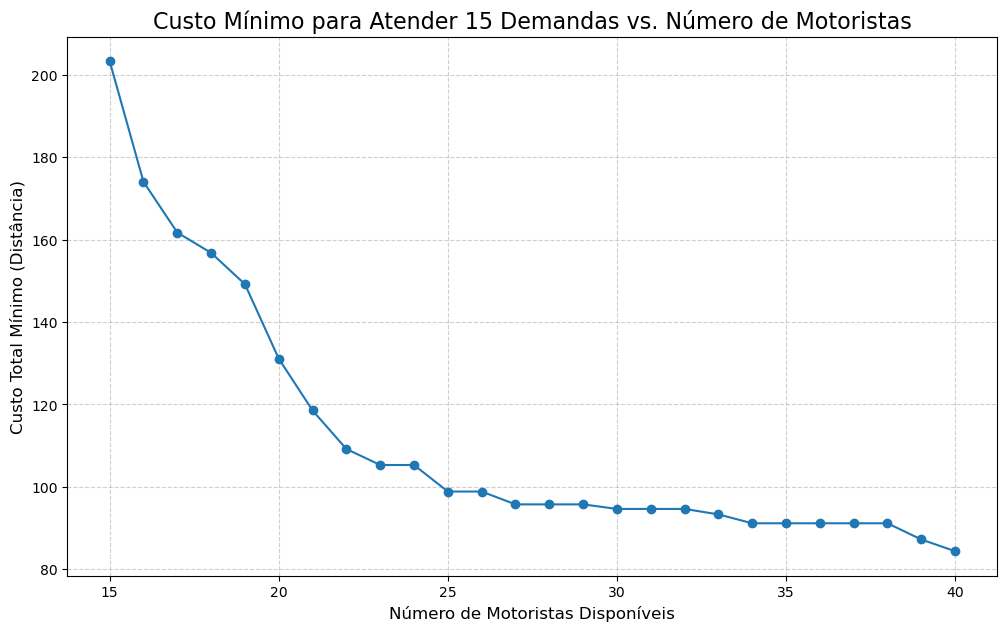

In [3]:
# --- Análise 1: Custo vs. Tamanho da Frota ---
num_demandas_fixo = 15
dados_analise_1 = {}

motoristas_range = range(num_demandas_fixo, 41) # De 15 a 40 motoristas
demandas = list(range(1, N_DEMANDAS_MAX + 1))

for m in motoristas_range:
    motoristas = list(range(1, m + 1))
    # Monte o dicionário de custos apenas para os motoristas e demandas atuais
    custos = {
        (i, j): custos_base[(i, j)]
        for i in motoristas
        for j in demandas
    }
    custo, _ = resolver_alocacao(motoristas, demandas, custos, num_demandas_fixo)
    if custo is not None:
        dados_analise_1[m] = custo

# --- Visualização ---
plt.figure(figsize=(12, 7))
plt.plot(list(dados_analise_1.keys()), list(dados_analise_1.values()), marker='o', linestyle='-')
plt.title(f'Custo Mínimo para Atender {num_demandas_fixo} Demandas vs. Número de Motoristas', fontsize=16)
plt.xlabel('Número de Motoristas Disponíveis', fontsize=12)
plt.ylabel('Custo Total Mínimo (Distância)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Com base no gráfico, a análise demonstra que o custo total para atender as 15 demandas diminui significativamente com a adição dos primeiros motoristas, mas o benefício de adicionar motoristas extras se torna progressivamente menor após aproximadamente 25 motoristas, indicando um ponto de rendimento decrescente.


## 3. Análise de Custo Marginal

Esta análise é um aprofundamento da anterior e é uma ferramenta poderosa para a tomada de decisão. Em vez de olhar o custo total, calculamos a **redução de custo** obtida ao adicionar cada novo motorista à frota. Isso nos ajuda a responder a pergunta: "Vale a pena contratar mais um motorista?".

A análise mostrará que os primeiros motoristas adicionais geram uma grande economia, mas esse benefício diminui progressivamente (rendimentos marginais decrescentes).

Tabela de Custo Total e Redução Marginal por Motorista Adicional:
 Num_Motoristas  Custo_Total  Reducao_Marginal
             15       203.35               NaN
             16       174.07             29.29
             17       161.75             12.32
             18       156.80              4.94
             19       149.19              7.62
             20       131.11             18.08
             21       118.53             12.59
             22       109.17              9.36
             23       105.29              3.88
             24       105.29              0.00
             25        98.84              6.44
             26        98.84              0.00
             27        95.72              3.12
             28        95.72              0.00
             29        95.72              0.00
             30        94.62              1.11
             31        94.62              0.00
             32        94.62              0.00
             33        93.30             

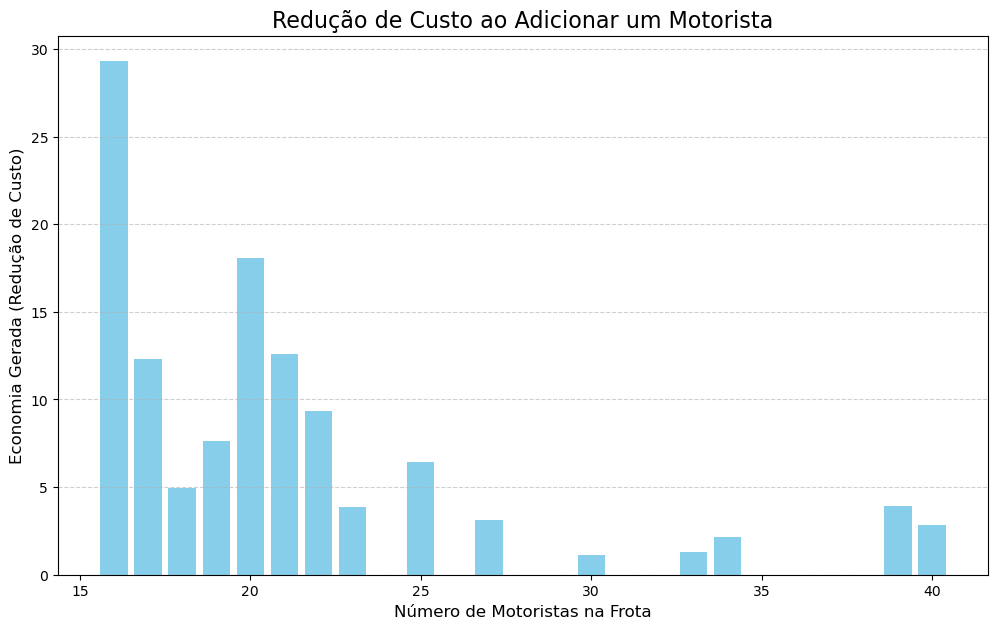

In [4]:
# --- Análise 2: Custo Marginal ---
df_analise = pd.DataFrame(list(dados_analise_1.items()), columns=['Num_Motoristas', 'Custo_Total'])
df_analise['Custo_Anterior'] = df_analise['Custo_Total'].shift(1)
df_analise['Reducao_Marginal'] = df_analise['Custo_Anterior'] - df_analise['Custo_Total']

print("Tabela de Custo Total e Redução Marginal por Motorista Adicional:")
print(df_analise[['Num_Motoristas', 'Custo_Total', 'Reducao_Marginal']].round(2).to_string(index=False))

# --- Visualização ---
plt.figure(figsize=(12, 7))
plt.bar(df_analise['Num_Motoristas'], df_analise['Reducao_Marginal'], color='skyblue')
plt.title('Redução de Custo ao Adicionar um Motorista', fontsize=16)
plt.xlabel('Número de Motoristas na Frota', fontsize=12)
plt.ylabel('Economia Gerada (Redução de Custo)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Este gráfico de barras quantifica o retorno decrescente do investimento, mostrando que a economia gerada ao adicionar os primeiros motoristas (por exemplo, o 16º) é muito alta, mas o benefício marginal de contratar novos motoristas cai drasticamente, tornando-se quase nulo após o 30º motorista.

## 4. Visualização Geográfica da Solução

Gráficos de custo são importantes, mas uma visualização espacial da alocação pode trazer insights valiosos sobre a distribuição geográfica das operações. O mapa abaixo mostra os motoristas e as demandas em um plano 2D, com linhas indicando as alocações ótimas encontradas pelo modelo.

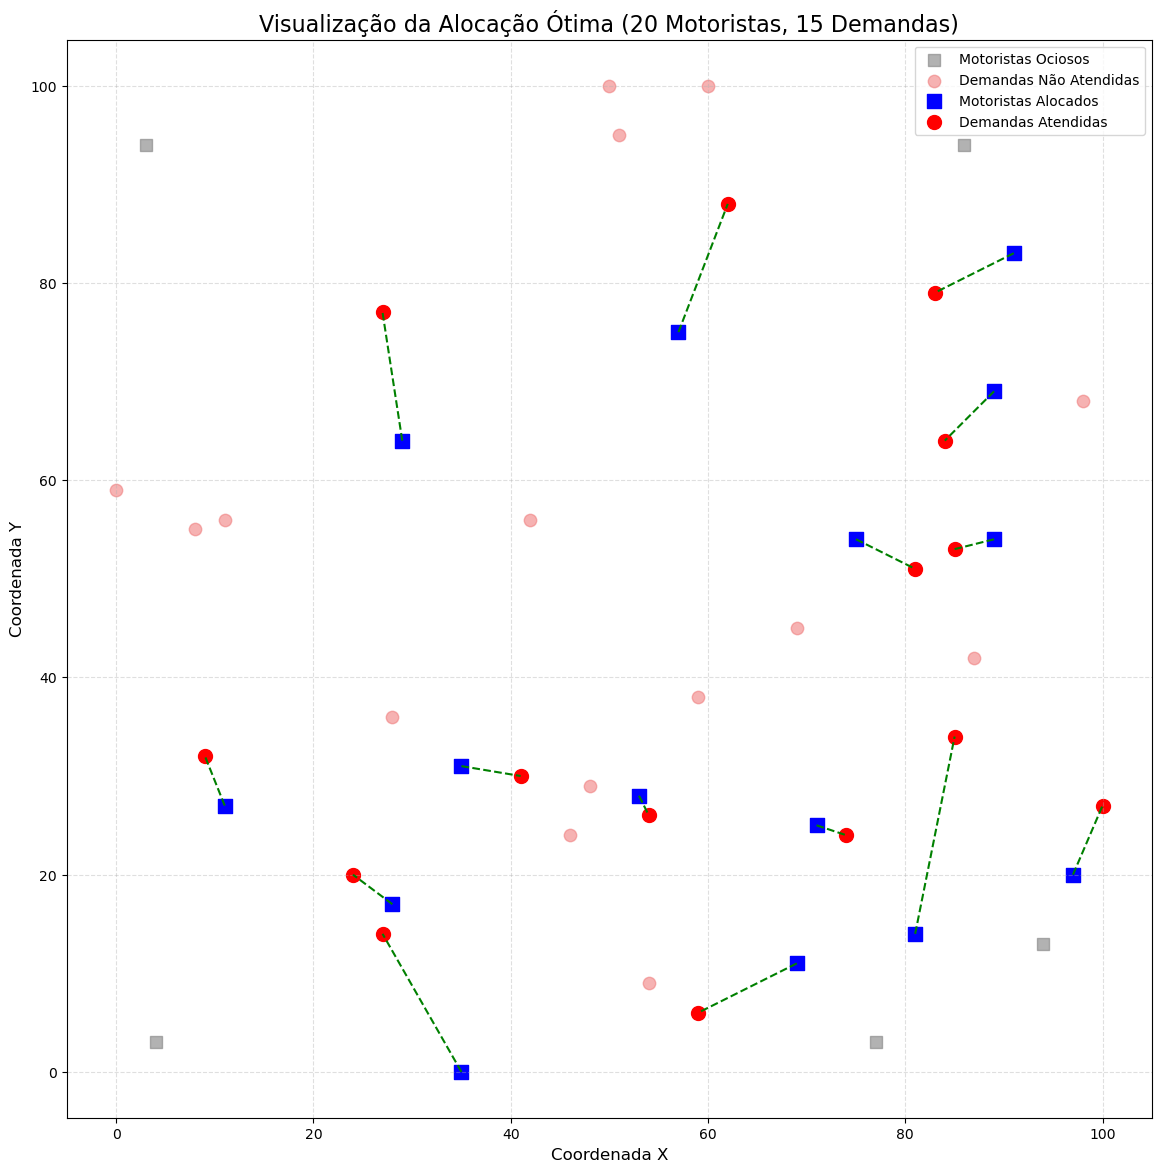

In [5]:
# --- Análise 3: Visualização Geográfica ---

# Escolhemos um cenário para visualizar, por exemplo, 20 motoristas para 15 demandas
num_motoristas_cenario = 20
num_demandas_cenario = 15

motoristas = list(range(1, num_motoristas_cenario + 1))
demandas = list(range(1, N_DEMANDAS_MAX + 1))

# Monte o dicionário de custos apenas para os motoristas e demandas do cenário
custos_cenario = {
    (i, j): custos_base[(i, j)]
    for i in motoristas
    for j in demandas
}

custo_cenario, alocacao_cenario = resolver_alocacao(motoristas, demandas, custos_cenario, num_demandas_cenario)

# Separando dados para o plot
loc_m = pd.DataFrame.from_dict(locais_motoristas_base, orient='index', columns=['x', 'y'])
loc_d = pd.DataFrame.from_dict(locais_demandas_base, orient='index', columns=['x', 'y'])

motoristas_alocados = list(alocacao_cenario.keys())
demandas_atendidas = list(alocacao_cenario.values())
motoristas_ociosos = [m for m in motoristas if m not in motoristas_alocados]
demandas_nao_atendidas = [d for d in demandas if d not in demandas_atendidas]

# --- Plotagem ---
plt.figure(figsize=(14, 14))

# Plot de motoristas e demandas não utilizados
plt.scatter(loc_m.loc[motoristas_ociosos]['x'], loc_m.loc[motoristas_ociosos]['y'], c='gray', marker='s', s=80, label='Motoristas Ociosos', alpha=0.6)
plt.scatter(loc_d.loc[demandas_nao_atendidas]['x'], loc_d.loc[demandas_nao_atendidas]['y'], c='lightcoral', marker='o', s=80, label='Demandas Não Atendidas', alpha=0.6)

# Plot de motoristas e demandas alocados
plt.scatter(loc_m.loc[motoristas_alocados]['x'], loc_m.loc[motoristas_alocados]['y'], c='blue', marker='s', s=100, label='Motoristas Alocados')
plt.scatter(loc_d.loc[demandas_atendidas]['x'], loc_d.loc[demandas_atendidas]['y'], c='red', marker='o', s=100, label='Demandas Atendidas')

# Desenhando as linhas de alocação
for motorista, demanda in alocacao_cenario.items():
    x_coords = [loc_m.loc[motorista]['x'], loc_d.loc[demanda]['x']]
    y_coords = [loc_m.loc[motorista]['y'], loc_d.loc[demanda]['y']]
    plt.plot(x_coords, y_coords, 'g--')

plt.title(f'Visualização da Alocação Ótima ({num_motoristas_cenario} Motoristas, {num_demandas_cenario} Demandas)', fontsize=16)
plt.xlabel('Coordenada X', fontsize=12)
plt.ylabel('Coordenada Y', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.4)
plt.axis('equal') # Garante que as escalas dos eixos sejam as mesmas
plt.show()

O gráfico acima mostra a visualização da alocação ótima com 20 motorista e 15 demandas.

## Modelagem da Variante 2

Nesta variante, cada motorista pode realizar até duas entregas. Simplificaremos o cálculo do custo para um motorista com duas entregas como a soma das distâncias diretas.

### Conjuntos e Parâmetros
* $I$: conjunto de motoristas ($i \in I$)
* $J$: conjunto de entregas ou demandas ($j \in J$)
* $c_{ij}$: distância (custo) entre a localização do motorista $i$ e o ponto de coleta da entrega $j$.
* $d_{jk}$: distância entre o ponto de entrega $j$ e o ponto de entrega $k$.

### Variáveis de Decisão
* $y_{ij} \in \{0, 1\}$: 1 se o motorista $i$ faz a primeira (ou única) entrega $j$, e 0 caso contrário.
* $w_{ijk} \in \{0, 1\}$: 1 se o motorista $i$ faz a entrega $j$ seguida da entrega $k$, e 0 caso contrário.
* $z_j \in \{0, 1\}$: 1 se a entrega $j$ é atendida, e 0 caso contrário.

### Função Objetivo
Minimizar a distância total da alocação:
$$
\min \sum_{i \in I} \sum_{j \in J} c_{ij} \cdot y_{ij} + \sum_{i \in I} \sum_{j \in J} \sum_{k \in J, k \neq j} (c_{ij} + d_{jk}) \cdot w_{ijk}
$$

### Restrições
1.  **Número de Entregas Atendidas:** Exatamente $k$ entregas devem ser atendidas.
    $$
    \sum_{j \in J} (y_{ij} + \sum_{k \in J, k \neq j} w_{ijk}) = z_j, \quad \forall j \in J
    $$
    $$
    \sum_{j \in J} z_j = k
    $$
2.  **Capacidade do Motorista:** Cada motorista pode fazer no máximo duas entregas.
    $$
    \sum_{j \in J} y_{ij} + \sum_{j \in J} \sum_{k \in J, k \neq j} w_{ijk} \leq 2, \quad \forall i \in I
    $$
3.  **Consistência da Rota:** Se um motorista faz a entrega $j$ seguida de $k$, ele deve ter feito a entrega $j$ como primeira entrega em alguma rota.
    $$
    \sum_{k \in J, k \neq j} w_{ijk} \leq z_j, \quad \forall i \in I, j \in J
    $$
4.  **Fluxo de Entregas (Simplificado):** Se um motorista faz duas entregas, a segunda deve ser diferente da primeira. Isso já está implícito em $k \neq j$ em $w_{ijk}$.
5.  **Cada Entrega Atendida no Máximo Uma Vez:**
    $$
    \sum_{i \in I} y_{ij} + \sum_{i \in I} \sum_{k \in J, k \neq j} (w_{ikj} + w_{ijk}) = z_j, \quad \forall j \in J
    $$

In [6]:
# --- Cálculo da Matriz de Distância entre Demandas ---
dist_demandas = {}
for j in locais_demandas_base:
    for k in locais_demandas_base:
        if j != k:
            dist_demandas[(j, k)] = calcular_distancia(locais_demandas_base.get(j, (0, 0)), locais_demandas_base.get(k, (0, 0)))

# Exemplo
if (1, 2) in dist_demandas:
    print(f"Distância entre demanda 1 e demanda 2: {dist_demandas[(1, 2)]:.2f}")
else:
    print("As demandas 1 e 2 são as mesmas ou não existem.")

Distância entre demanda 1 e demanda 2: 21.59


In [7]:
def resolver_alocacao_v2(num_motoristas, num_demandas, custos_md, dist_dd, k_entregas):
    """
    Resolve a variante do problema de alocação onde cada motorista pode fazer até duas entregas.

    Args:
        num_motoristas (int): Número de motoristas disponíveis.
        num_demandas (int): Número de demandas disponíveis.
        custos_md (dict): Custos motorista para demanda.
        dist_dd (dict): Distâncias entre demandas.
        k_entregas (int): Número exato de entregas a serem atendidas.

    Returns:
        float: Custo total mínimo.
        dict: Alocações (motorista -> [demanda1, demanda2]).
    """
    if k_entregas > 2 * num_motoristas:
        return None, None

    modelo = pyo.ConcreteModel("Alocacao_Motoristas_V2")

    # --- Conjuntos ---
    modelo.I = pyo.Set(initialize=range(1, num_motoristas + 1))
    modelo.J = pyo.Set(initialize=range(1, num_demandas + 1))

    # --- Parâmetros ---
    modelo.c = pyo.Param(modelo.I, modelo.J, initialize=custos_md)
    # Corrija a lambda para aceitar três argumentos
    modelo.d = pyo.Param(
        modelo.J, modelo.J,
        initialize=lambda modelo, m, n: dist_dd.get((m, n), 0) if m != n else 0
    )
    
    # --- Variáveis ---
    modelo.y = pyo.Var(modelo.I, modelo.J, domain=pyo.Binary)  # Motorista i faz entrega j (primeira ou única)
    modelo.w = pyo.Var(modelo.I, modelo.J, modelo.J, domain=pyo.Binary) # Motorista i faz j seguido de k
    modelo.z = pyo.Var(modelo.J, domain=pyo.Binary) # Entrega j é atendida

    # --- Função Objetivo ---
    modelo.objetivo = pyo.Objective(
        expr=sum(modelo.c[(i, j)] * modelo.y[(i, j)] for i in modelo.I for j in modelo.J) +
             sum((modelo.c[(i, j)] + modelo.d[(j, k)]) * modelo.w[(i, j, k)] for i in modelo.I for j in modelo.J for k in modelo.J if j != k),
        sense=pyo.minimize
    )

    # --- Restrições ---
    modelo.restricoes = pyo.ConstraintList()

    # Número total de entregas atendidas
    modelo.restricoes.add(sum(modelo.z[(j)] for j in modelo.J) == k_entregas)

    # Relação entre z e y/w (se entrega j é atendida, deve haver um y ou w associado)
    for j in modelo.J:
        modelo.restricoes.add(sum(modelo.y[(i, j)] for i in modelo.I) + sum(modelo.w[(i, other_j, j)] for i in modelo.I for other_j in modelo.J if other_j != j) >= modelo.z[(j)])

    # Capacidade do motorista (máximo 2 entregas)
    for i in modelo.I:
        modelo.restricoes.add(
            sum(modelo.y[(i, j)] for j in modelo.J) + sum(modelo.w[(i, j, k)] for j in modelo.J for k in modelo.J if j != k) <= 2
        )

    # Consistência da rota (se w_ijk = 1, então y_ij deve ser 1) - Simplificação: não forçamos isso estritamente para evitar complexidade excessiva para o gráfico 3D
    # Em vez disso, confiamos na minimização do custo para incentivar rotas lógicas.

    # Cada entrega é atendida no máximo uma vez (considerando y e w)
    for j in modelo.J:
        modelo.restricoes.add(
            sum(modelo.y[(i, j)] for i in modelo.I) +
            sum(modelo.w[(i, j, k)] for i in modelo.I for k in modelo.J if k != j) +
            sum(modelo.w[(i, k, j)] for i in modelo.I for k in modelo.J if k != j) == modelo.z[(j)]
        )


    # --- Resolução ---
    solver = pyo.SolverFactory('gurobi')
    resultado = solver.solve(modelo)

    alocacoes = {}
    custo_otimo = None

    if resultado.solver.termination_condition == pyo.TerminationCondition.optimal:
        custo_otimo = pyo.value(modelo.objetivo)
        for i in modelo.I:
            entregas_motorista = []
            for j in modelo.J:
                if pyo.value(modelo.y[(i, j)]) > 0.5:
                    entregas_motorista.append(j)
                for k in modelo.J:
                    if j != k and pyo.value(modelo.w[(i, j, k)]) > 0.5:
                        entregas_motorista.extend([j, k]) # Adicionamos ambas, mas precisamos tratar como uma rota

            if entregas_motorista:
                # Agrupar em rotas (simplificado: se w está ativo, considera-se j->k uma rota)
                rotas = []
                for j in modelo.J:
                    for k in modelo.J:
                        if j != k and pyo.value(modelo.w[(i, j, k)]) > 0.5:
                            rotas.append((j, k))
                unicas = [j for j in modelo.J if pyo.value(modelo.y[(i, j)]) > 0.5 and not any(j in rota for rota in rotas)]

                if unicas:
                    alocacoes.setdefault(i, []).extend(unicas)
                if rotas:
                    alocacoes.setdefault(i, []).extend([r for r in rotas if r not in alocacoes.get(i, [])])


    return custo_otimo, alocacoes

In [8]:
import plotly.graph_objects as go
import numpy as np

# --- Geração de Dados para o Gráfico 3D ---
custos_3d = np.zeros((20, 10)) # 20 motoristas, 10 demandas

for m in range(1, 21):
    for d in range(1, 11):
        motoristas = list(range(1, m + 1))
        demandas = list(range(1, d + 1))
        custos_md = {
            (i, j): custos_base[(i, j)]
            for i in motoristas
            for j in demandas
        }
        dist_dd = {
            (j, k): dist_demandas[(j, k)]
            for j in demandas
            for k in demandas
            if j != k
        }
        custo, _ = resolver_alocacao_v2(m, d, custos_md, dist_dd, d)
        if custo is not None:
            custos_3d[(m - 1), (d - 1)] = custo

# Setando altura para 0 onde a solução é impossível (mais demandas que 2 * motoristas)
for m in range(20):
    for d in range(10):
        if d + 1 > 2 * (m + 1):
            custos_3d[(m), (d)] = 0 # Altura zero para impossível

num_motoristas_range = np.arange(1, 21)
num_demandas_range = np.arange(1, 11)
X, Y = np.meshgrid(num_motoristas_range, num_demandas_range)

# --- Plotly 3D Surface ---
fig = go.Figure(data=[go.Surface(
    x=X, y=Y, z=custos_3d.T, colorscale='Viridis'
)])

fig.update_layout(
    title='Custo Mínimo em Função de Motoristas e Demandas (Até 2 Entregas/Motorista)',
    scene=dict(
        xaxis_title='Número de Motoristas',
        yaxis_title='Número de Demandas',
        zaxis_title='Custo Total Mínimo'
    ),
    autosize=True,
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

O gráfico de superfície 3D demonstra que o custo mínimo para atender as demandas cresce acentuadamente à medida que o número de demandas se aproxima do dobro do número de motoristas, enquanto a adição de mais motoristas reduz o custo geral ao proporcionar maior flexibilidade de alocação.


--- Alocação Ótima (Variante 2) com 15 Motoristas e 25 Demandas ---
Custo Total Mínimo: 405.96
Alocações (Motorista -> [Demanda(s)]):
Motorista 1: [1, 24]
Motorista 2: [5]
Motorista 3: [6, 16]
Motorista 4: [11, 21]
Motorista 5: [8, 23]
Motorista 6: [15, 25]
Motorista 7: [3, 14]
Motorista 8: [2, 17]
Motorista 10: [10, 19]
Motorista 11: [9, 12]
Motorista 13: [18, 20]
Motorista 14: [7, 22]
Motorista 15: [4, 13]


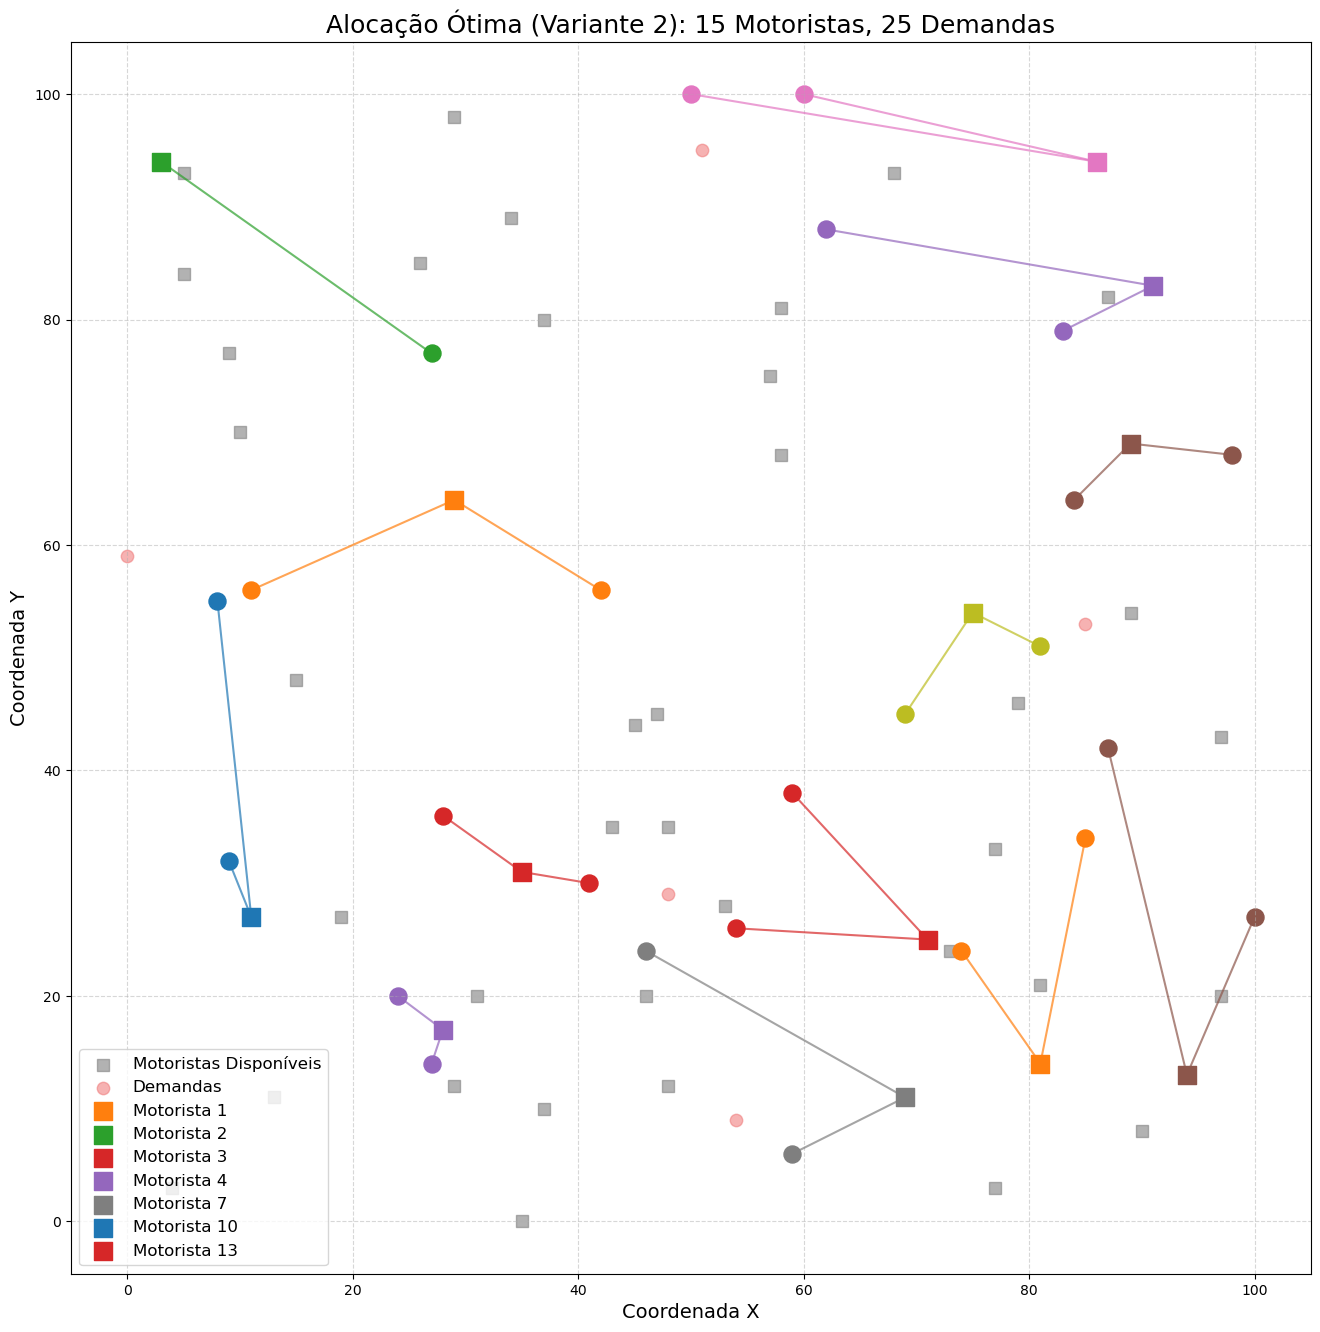

In [ ]:
# Parâmetros desejados
num_motoristas_otimo_v2 = 15
num_demandas_otimo_v2 = 25

motoristas = list(range(1, num_motoristas_otimo_v2 + 1))
demandas = list(range(1, num_demandas_otimo_v2 + 1))

custos_md = {
    (i, j): custos_base[(i, j)]
    for i in motoristas
    for j in demandas
}
dist_dd = {
    (j, k): dist_demandas[(j, k)]
    for j in demandas
    for k in demandas
    if j != k
}

custo_otimo_v2, alocacao_otima_v2 = resolver_alocacao_v2(
    num_motoristas_otimo_v2,
    num_demandas_otimo_v2,
    custos_md,
    dist_dd,
    num_demandas_otimo_v2
)

import pandas as pd

loc_m_df = pd.DataFrame.from_dict(locais_motoristas_base, orient='index', columns=['x', 'y'])
loc_d_df = pd.DataFrame.from_dict(locais_demandas_base, orient='index', columns=['x', 'y'])

if custo_otimo_v2 is not None:
    print(f"\n--- Alocação Ótima (Variante 2) com {num_motoristas_otimo_v2} Motoristas e {num_demandas_otimo_v2} Demandas ---")
    print(f"Custo Total Mínimo: {custo_otimo_v2:.2f}")
    print("Alocações (Motorista -> [Demanda(s)]):")
    for motorista, demandas in alocacao_otima_v2.items():
        print(f"Motorista {motorista}: {demandas}")

    # --- Plotagem Geográfica (TODOS no mesmo gráfico) ---
    plt.figure(figsize=(16, 16))

    # Plot de todos os motoristas e demandas
    plt.scatter(loc_m_df['x'], loc_m_df['y'], c='gray', marker='s', s=80, label='Motoristas Disponíveis', alpha=0.6)
    plt.scatter(loc_d_df['x'], loc_d_df['y'], c='lightcoral', marker='o', s=80, label='Demandas', alpha=0.6)

    cores_motoristas = {}
    for i in range(1, num_motoristas_otimo_v2 + 1):
        cores_motoristas.setdefault(i, f'C{i % 10}') # Cores diferentes para cada motorista

    demandas_atendidas_plot = set()

    for motorista, entregas in alocacao_otima_v2.items():
        cor = cores_motoristas.get(motorista, 'black')
        loc_mot = locais_motoristas_base.get(motorista)
        if loc_mot:
            plt.scatter(loc_mot[0], loc_mot[1], c=cor, marker='s', s=150, label=f'Motorista {motorista}' if motorista not in demandas_atendidas_plot else "")
            for demanda_id in entregas:
                loc_dem = locais_demandas_base.get(demanda_id)
                if loc_dem:
                    plt.scatter(loc_dem[0], loc_dem[1], c=cor, marker='o', s=150)
                    plt.plot([loc_mot[0], loc_dem[0]], [loc_mot[1], loc_dem[1]], linestyle='-', color=cor, alpha=0.7)
                    demandas_atendidas_plot.add(demanda_id)
                    # Se houver uma segunda entrega na 'rota' (simplificação), plotar a segunda conexão
                    if isinstance(demanda_id, tuple): # Indicador de 'rota' j->k
                        loc_dem2 = locais_demandas_base.get(demanda_id[-1])
                        loc_dem1 = locais_demandas_base.get(demanda_id[-2])
                        if loc_dem1 and loc_dem2:
                            plt.plot([loc_dem1[0], loc_dem2[0]], [loc_dem1[1], loc_dem2[1]], linestyle='--', color=cor, alpha=0.7)

    plt.title(f'Alocação Ótima (Variante 2): {num_motoristas_otimo_v2} Motoristas, {num_demandas_otimo_v2} Demandas', fontsize=18)
    plt.xlabel('Coordenada X', fontsize=14)
    plt.ylabel('Coordenada Y', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')
    plt.show()
else:
    print("Não foi possível encontrar uma solução ótima para a Variante 2 com os parâmetros fornecidos.")